## Visualizing Recent Earthquakes using free dataset from the USGS website.
1. Import libraries: We import pathlib for handling file paths, 
    json for parsing the GeoJSON data, and plotly.graph_objects for creating the visualization.
2. Load GeoJSON data: We use pathlib.Path to create a path object for the GeoJSON file and then open it  and load
    the contents into a Python dictionary using json.load().
    Extract data: We extract the latitude, longitude, and magnitude values from the GeoJSON data and store them in separate lists.
4. Create the map: We create a go.Scattergeo object using Plotly, specifying the latitude, longitude, and magnitude values.
    We set the marker size and color based on the magnitude, using the Viridis color scale and adding a colorbar
    to indicate the magnitude range.
    We update the layout of the figure to set the title, scope, and appearance of the map.
5. Finally, we use fig.show() to display the map.
    This code will create an interactive map showing the locations of recent earthquakes, with marker size and color
    representing the magnitude. You can customize the map further by adjusting the color scale, adding more details, or
    using different types of markers.

##### NB: the negative mag values were changed to positives using the abs funtion   

In [6]:
## Loading the important the required libraries
import json
from pathlib import Path as p
import plotly.express as px


In [8]:
## Locate the path to the data (path could either to absolute or relative)
path = p("/Users/kojol/OneDrive/Desktop/all_eq_30_days.geojson")

In [16]:
## read the contents as txt
read_contents = path.read_text(encoding='utf-8')

## load with json 
json_format = json.loads(read_contents)
json_format


{'type': 'FeatureCollection',
 'metadata': {'generated': 1725886717000,
  'url': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.geojson',
  'title': 'USGS All Earthquakes, Past Month',
  'status': 200,
  'api': '1.10.3',
  'count': 9462},
 'features': [{'type': 'Feature',
   'properties': {'mag': 1.5,
    'place': '60 km NNW of Aleneva, Alaska',
    'time': 1725885553174,
    'updated': 1725885680602,
    'tz': None,
    'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/ak024bmmce51',
    'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/ak024bmmce51.geojson',
    'felt': None,
    'cdi': None,
    'mmi': None,
    'alert': None,
    'status': 'automatic',
    'tsunami': 0,
    'sig': 35,
    'net': 'ak',
    'code': '024bmmce51',
    'ids': ',ak024bmmce51,',
    'sources': ',ak,',
    'types': ',origin,phase-data,',
    'nst': None,
    'dmin': None,
    'rms': 0.39,
    'gap': None,
    'magType': 'ml',
    'type': 'earthquake',
    'ti

In [25]:
#inspect data to find addtional inforamtion on earthquakes
all_eq_dicts = json_format["features"]
all_eq_dicts
#print(len(all_eq_dicts))

[{'type': 'Feature',
  'properties': {'mag': 1.5,
   'place': '60 km NNW of Aleneva, Alaska',
   'time': 1725885553174,
   'updated': 1725885680602,
   'tz': None,
   'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/ak024bmmce51',
   'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/ak024bmmce51.geojson',
   'felt': None,
   'cdi': None,
   'mmi': None,
   'alert': None,
   'status': 'automatic',
   'tsunami': 0,
   'sig': 35,
   'net': 'ak',
   'code': '024bmmce51',
   'ids': ',ak024bmmce51,',
   'sources': ',ak,',
   'types': ',origin,phase-data,',
   'nst': None,
   'dmin': None,
   'rms': 0.39,
   'gap': None,
   'magType': 'ml',
   'type': 'earthquake',
   'title': 'M 1.5 - 60 km NNW of Aleneva, Alaska'},
  'geometry': {'type': 'Point', 'coordinates': [-153.3455, 58.5515, 67.4]},
  'id': 'ak024bmmce51'},
 {'type': 'Feature',
  'properties': {'mag': 0.54,
   'place': '13 km NE of Ridgecrest, CA',
   'time': 1725884676890,
   'updated': 1725885014278,
   '

In [100]:
#using a loop we extract all relevant information needed to create our map
## we need a lon, lat, magnitude of the earthquakes,location names

lats, lons, mags, titles = [],[],[],[]

for eq_details in all_eq_dicts:
    lons.append(eq_details["geometry"]["coordinates"][0])
    lats.append(eq_details["geometry"]["coordinates"][1])
    mags.append(eq_details["properties"]["mag"])
    titles.append(eq_details["properties"]["title"])


In [109]:
new_mags = [abs(mag) for mag in mags]

## plot extracted data using plotly

In [127]:
#Extract Title of map from the metadata
title = json_format["metadata"]["title"]


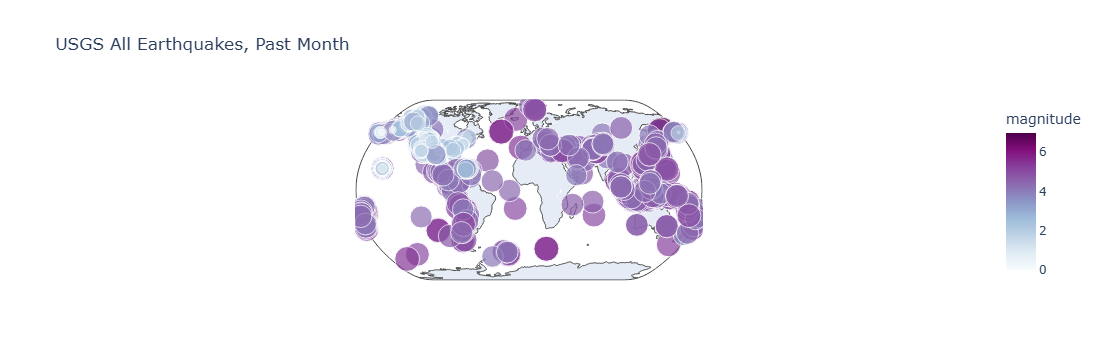

In [125]:
fig = px.scatter_geo(
    lat = lats,
    lon = lons,
    title = title,
    size = new_mags,
    projection = 'natural earth',
    color = new_mags,
    color_continuous_scale = 'bupu',
    labels = {'color': 'magnitude', 'size': 'Mag' },
    hover_name=titles
    
)
fig.show()